### Introduction
This is the a portfolio builder project, which contains an Exploratory Data Analysis and Data visualization 
###
This project was made using the Disney+ Movies and TV Shows DataSet From Kaggle

### Step 1. Import the  libraries that we need

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px


### Step 2. Import the dataset and assign it to a variable named disney_data

In [6]:
disney_data = pd.read_csv("/workspaces/all_in_one/Portfolio-Builder/disney_plus_titles.csv")

disney_data = pd.read_csv("/workspaces/Portfolio-Builder/disney_plus_titles.csv")

### Step 3. Explore the Data & Data Visualization

In [7]:
disney_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [8]:
disney_data.shape

(1450, 12)

In [9]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [28]:
disney_data['rating'].value_counts()

TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

In [10]:
# How many null values (if any) in each column
disney_data.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

<AxesSubplot:>

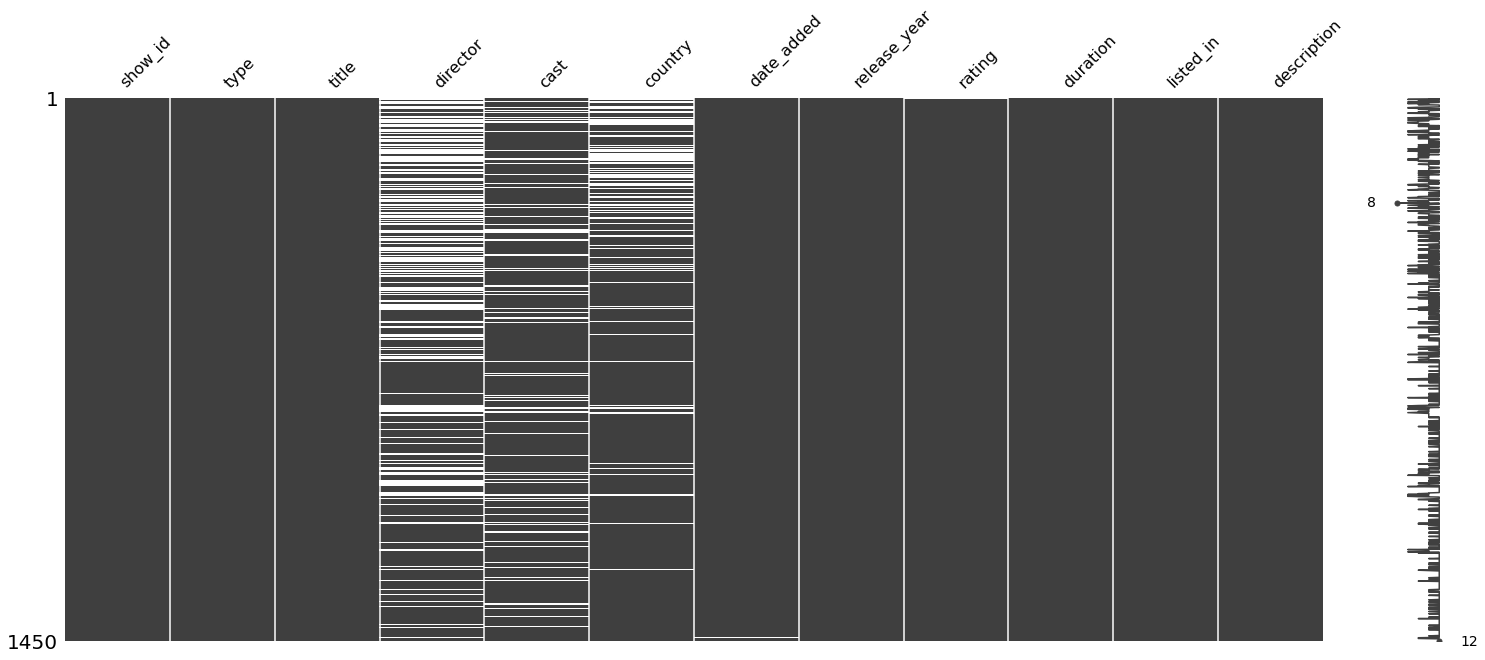

In [20]:
msno.matrix(disney_data)

In [115]:
# Exploring The Diffrent Categories 
disney_data['listed_in'].value_counts().to_frame()

,listed_in
"Animation, Comedy, Family",124
"Action-Adventure, Animation, Comedy",77
"Action-Adventure, Animation, Kids",45
"Action-Adventure, Animation, Family",40
"Animals & Nature, Documentary, Family",40
...,...
"Animals & Nature, Family, Reality",1
"Dance, Music, Musical",1
"Comedy, Family, Lifestyle",1
"Buddy, Docuseries",1


In [11]:
disney_data['type'].value_counts()

Movie      1052
TV Show     398
Name: type, dtype: int64

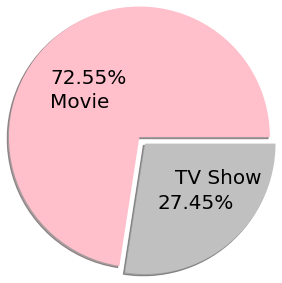

In [12]:
y = disney_data['type'].value_counts()
mylabels = disney_data['type'].unique()
mycolor = ['#FFC0CB', '#C0C0C0']
myexplode = [0.1, 0]
plt.pie(y, labels=mylabels, colors=mycolor,radius = 1.5, textprops={'fontsize': 20},
explode = myexplode, shadow = True, labeldistance = 0.35, autopct = "%0.2f%%", pctdistance = 0.6)
plt.show()

In [113]:
disney_data['director'].value_counts()


Jack Hannah         17
John Lasseter       16
Paul Hoen           16
Robert Stevenson    12
Charles Nichols     12
                    ..
Simon Wells          1
David Lynch          1
Don Bluth            1
Milt Schaffer        1
Mark Waring          1
Name: director, Length: 609, dtype: int64

In [94]:
disney_data['release_year'].value_counts()

2021    125
2020    114
2019     99
2017     69
2018     65
       ... 
1928      1
1944      1
1970      1
1945      1
1968      1
Name: release_year, Length: 90, dtype: int64

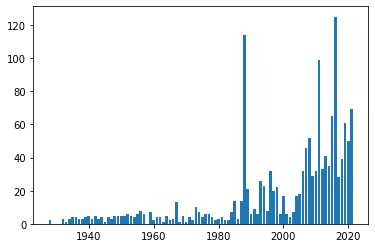

In [95]:
# Top 100 release Years
y = disney_data['release_year'].value_counts()
x = disney_data['release_year'].unique()
plt.bar(x[:100],y[:100])
plt.show()

In [111]:

# Top 10 Directors
values = disney_data['director'].value_counts()
keys = disney_data['director'].value_counts().keys()

fig = px.bar(y = keys[:10], x = values[:10], data_frame = disney_data, 
             title="Top 10 Directors", 
             labels={'x': 'number of movies', 'y': 'Directors', },)
fig.show()